In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from variational_method.method import method
import variational_method.metrics as metrics
import findiff

In [3]:
def super_gauss(x, y, a, N):
    """
    Супергаусс на сетке x,y с параметрами a, N
    :param x: сетка по x
    :param y: сетка по y
    :param a: параметр, отвечает за размер области, которую срезает супергаусс
    :param N: отвечает за "крутизну" супергаусс, чем больше, тем быстрее функция стремится к 0
    :return: 2d array
    """
    return np.exp(-((x**2 + y**2) / a**2) ** N)


def normalize(front):
    """
    Нормирует исходный волновой фронт на квадрат [-1, 1] x [-1, 1]
    :param front: волновой фронт
    :return: отнормированный волновой фронт
    """
    tmp = front
    tmp -= tmp.min()
    tmp /= tmp.max()
    return tmp


def mse(orig, restored):
    return np.linalg.norm(orig - restored) / np.sqrt(np.prod(restored.shape))


def get_mask(x, y, r):
    return 1 *(x**2 + y**2 < r**2)


def cernike(x, y, func):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(x, y)
    return func(rho, phi)


def d_rho_dx(x, y):
    return x / np.sqrt(x**2 + y**2)


def d_rho_dy(x, y):
    return y / np.sqrt(x**2 + y**2)


def d_phi_dx(x, y):
    return 1 / (y * (1 + (x / y)**2))


def d_phi_dy(x, y):
    return - x / (y**2 * (1 + (x / y)**2))


def get_hole(x, y, r):
    return get_mask(x, y, r) ^ 1

0.1540249505013971


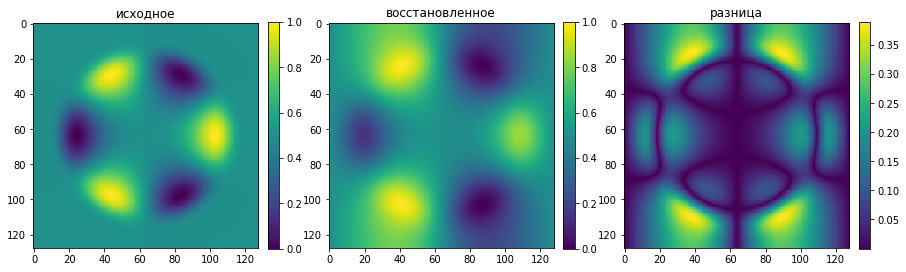

In [6]:
M = 7
a = 1
h = 2 * a / 2**M
x, y = np.mgrid[-a:a:1j * 2 ** M, -a:a:1j * 2 ** M]
# d_dx = findiff.FinDiff(0, 1, 1, acc = 10)
# d_dy = findiff.FinDiff(1, 1, 1, acc = 10)


zernikes = dict()
gauss = super_gauss(x, y, 0.7 * a, 4)
zernikes['Z_2^-2'] = normalize(cernike(x, y, lambda r, phi: r**2 * np.sin(2 * phi) ) * gauss)
zernikes['Z_3^-1'] = normalize(cernike(x, y, lambda r, phi: 3*r**3 - 2 * r * np.sin(phi) ) * gauss)
zernikes['Z_3^3'] = normalize(cernike(x, y, lambda r, phi: r**3 * np.cos(3 * phi) ) * gauss)

front = zernikes['Z_3^3']

# g1 = d_dx(front)
# g2 = d_dy(front)
rho = np.sqrt(x**2 + y**2)
phi = np.arctan2(x, y)
g1 = 3 * rho**2 * d_rho_dx(x, y) * np.cos(3 * phi) + rho**3 * 3 * (-np.sin(3 * phi)) * d_phi_dx(x, y)
g1 *= gauss

g2 = 3 * rho**2 * d_rho_dy(x, y) * np.cos(3 * phi) + rho**3 * 3 * (-np.sin(3 * phi)) * d_phi_dy(x, y)
g2 *= gauss

restored_front = normalize(method(g1, g2, h, h, alpha=1e-3, gamma=0.0028, s=0.842, l = a))
front = normalize(front)
restored_front = normalize(restored_front) 

print(mse(front, restored_front))
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
img1 = axes[0].imshow(front)
img2 = axes[1].imshow(restored_front)
img3 = axes[2].imshow(np.abs(restored_front -front))
axes[0].set_title('исходное')
axes[1].set_title('восстановленное')
axes[2].set_title('разница')
fig.colorbar(img1, ax = axes[0],fraction=0.046, pad=0.04)
fig.colorbar(img2, ax = axes[1],fraction=0.046, pad=0.04)
fig.colorbar(img3, ax = axes[2],fraction=0.046, pad=0.04)

In [7]:
xlabels = np.linspace(-1, 1, 2)
xlabels

array([-1.,  1.])

In [14]:
start

-0.5

In [15]:
end

127.5